In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
# read data
data = pd.read_csv('product_data.csv')
data.head()

,order_id,order_status,order_purchase_timestamp,customer_state,price,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,SP,29.99,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,BA,118.70,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,GO,159.90,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,RN,45.00,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,SP,19.90,stationery


In [8]:
# Data Cleaning

# 1. Check for null values
data.isnull().sum()

# tidak ada null values



order_id                         0
order_status                     0
order_purchase_timestamp         0
customer_state                   0
price                            0
product_category_name_english    0
dtype: int64

In [38]:
# 2. Check for duplicate values
duplicate = data[data.duplicated()]
duplicate.head()

# dibiarkan, karena beberapa data memang memiliki nilai yang sama

,order_id,order_status,order_purchase_timestamp,customer_state,price,category,month,year
10,e6ce16cb79ec1d90b1da9085a6118aeb,delivered,2017-05-16 19:41:10,RJ,99.00,garden_tools,5,2017
54,9faeb9b2746b9d7526aef5acb08e2aa0,delivered,2018-07-26 14:39:59,RS,60.00,sports_leisure,7,2018
60,66e4624ae69e7dc89bd50222b59f581f,delivered,2018-03-09 14:50:15,SE,22.99,telephony,3,2018
70,f271576bed568e896f99eb710cd3a6f8,delivered,2018-01-07 21:44:54,BA,329.90,construction_tools_construction,1,2018
73,68e48e68da1f50f7c5838ea75e3a20dd,delivered,2018-06-18 16:02:23,SP,84.90,auto,6,2018


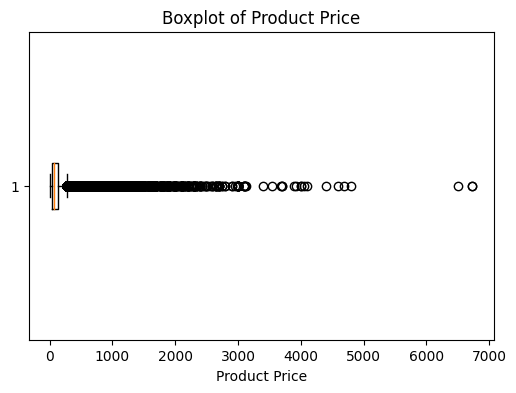

Q1 : 39.90
Q3 : 134.90
IQR : 95.00
Maximum Boundary : 277.40


,order_id,order_status,order_purchase_timestamp,customer_state,price,category,month,year
16,403b97836b0c04a622354cf531062e5f,delivered,2018-01-02 19:00:43,RJ,1299.00,construction_tools_construction,1,2018
31,f70a0aff17df5a6cdd9a7196128bd354,delivered,2017-08-10 11:58:33,SP,279.00,baby,8,2017
39,434d158e96bdd6972ad6e6d73ddcfd22,delivered,2018-06-01 12:23:13,PE,445.00,health_beauty,6,2018
42,6ea2f835b4556291ffdc53fa0b3b95e8,delivered,2017-11-24 21:27:48,SP,339.00,housewares,11,2017
55,641fb0752bf5b5940c376b3a8bb9dc52,delivered,2017-12-15 00:06:10,RJ,369.00,watches_gifts,12,2017
...,...,...,...,...,...,...,...,...
110993,3cea94817a51f34aa5937784fb4a3219,delivered,2018-04-01 16:13:26,MG,439.65,health_beauty,4,2018
110994,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-10 21:21:07,SP,356.00,sports_leisure,8,2017
110995,e8fd20068b9f7e6ec07068bb7537f781,delivered,2017-08-10 21:21:07,SP,356.00,sports_leisure,8,2017
111004,6ec4642f9993cc34f826cfb9068e5a2f,delivered,2017-11-21 20:18:03,MG,299.90,construction_tools_construction,11,2017


In [22]:
# 3. Check for outliers
# show boxplot of price
plt.figure(figsize=(6, 4))
plt.boxplot(data['price'], vert=False)
plt.xlabel('Product Price')
plt.title('Boxplot of Product Price')
plt.show()

# handle the outliers

# Q1 & Q3
Q1 = data.price.quantile(0.25)
Q3 = data.price.quantile(0.75)

print(f"Q1 : {Q1:.2f}")
print(f"Q3 : {Q3:.2f}")

# IQR & maximum boundary
IQR = Q3 - Q1
max_bound = Q3 + 1.5*IQR 

print(f"IQR : {IQR:.2f}")
print(f"Maximum Boundary : {max_bound:.2f}")

# Show outliers
data_filtered = data[data["price"]> max_bound]
data_filtered

# outliers dibiarkan, karena analisis berfokus pada produk

In [12]:
# Data Manipulation
# 1. Extract month and year from order purchase timestamp
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp'])
data['month'] = data['order_purchase_timestamp'].dt.month
data['year'] = data['order_purchase_timestamp'].dt.year
data.head()


,order_id,order_status,order_purchase_timestamp,customer_state,price,product_category_name_english,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,delivered,2017-10-02 10:56:33,SP,29.99,housewares,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,delivered,2018-07-24 20:41:37,BA,118.70,perfumery,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,delivered,2018-08-08 08:38:49,GO,159.90,auto,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,delivered,2017-11-18 19:28:06,RN,45.00,pet_shop,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,delivered,2018-02-13 21:18:39,SP,19.90,stationery,2,2018


In [14]:
# 2. Find most sold product category
# Rename the column "product_category_name_english" to "category"
data = data.rename(columns={'product_category_name_english': 'category'})

# group the data by category and count the number of orders
product_count = data.groupby('category')['order_id'].count().reset_index()
product_count.columns = ['product_category', 'total_sold']
top_10_products = product_count.sort_values(by='total_sold', ascending=False).head(10)

# Calculate the total revenue for each product category
top_10_products['total_revenue'] = top_10_products['total_sold'] * data['price']

print(top_10_products)


         product_category  total_sold  total_revenue
7          bed_bath_table       11115       221188.5
43          health_beauty        9670       675933.0
65         sports_leisure        8641      2583659.0
39        furniture_decor        8334      3708630.0
15  computers_accessories        7827      1036294.8
49             housewares        6964       236079.6
70          watches_gifts        5991      1976430.9
68              telephony        4545       904455.0
42           garden_tools        4347      1473633.0
5                    auto        4235       626356.5


In [15]:
# 3. Find the product with biggest revenue
# Sort by total revenue
top_10_revenue_products = top_10_products.sort_values(by='total_revenue', ascending=False).head(10)

print(top_10_revenue_products)

         product_category  total_sold  total_revenue
39        furniture_decor        8334      3708630.0
65         sports_leisure        8641      2583659.0
70          watches_gifts        5991      1976430.9
42           garden_tools        4347      1473633.0
15  computers_accessories        7827      1036294.8
68              telephony        4545       904455.0
43          health_beauty        9670       675933.0
5                    auto        4235       626356.5
49             housewares        6964       236079.6
7          bed_bath_table       11115       221188.5


In [44]:
# 4. Product growth in 2018, for top 3 in most sold product category and most revenue product
# growth
growth = data.groupby(['category', 'year'])['order_id'].count().reset_index()
pivot_table = pd.pivot_table(growth, values='order_id', index='year', columns='category', fill_value=0)
category_growth = pivot_table.pct_change(fill_method=None) * 100

# filter data
categories_to_analyze = ['bed_bath_table', 'health_beauty', 'sports_leisure', 'furniture_decor', 'watches_gifts']

# filter year
category_growth_2018 = category_growth.loc[2018, categories_to_analyze]

print(category_growth_2018)


category
bed_bath_table     12.655562
health_beauty      62.241003
sports_leisure     10.549451
furniture_decor    -0.699301
watches_gifts      62.198861
Name: 2018, dtype: float64


In [37]:
# 5. Pesanan yang dibatalkan paling banyak di negara mana? Produk apa?
# cancelled order
canceled_orders = data[data['order_status'] == 'canceled']

# Group the data by customer_state and product_category and count the number of cancelled orders
most_canceled = canceled_orders.groupby(['customer_state', 'category'])['order_id'].count().reset_index()

# Find the state and product with the most cancellations
most_canceled = most_canceled.sort_values(by='order_id', ascending=False).head(1)
most_canceled.columns = ['state', 'category', 'total_cancelled']
print(most_canceled)


    state        category  total_cancelled
162    SP  sports_leisure               29
